#MORENO SANTIAGO JOSÉ MIGUEL

#Tarea 6: Funciones, Modelos personalizados y Ecuaciones Diferenciales

**1. Diseñar una capa en keras que transforme imágenes a color en escala de grises. Pueden usar la base de datos mnist o cualquier otra para hacer las pruebas.**

In [3]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [4]:
# Descargar y cargar los datos de entrenamiento y prueba
datos, metadatos = tfds.load('cats_vs_dogs', as_supervised=True, with_info=True)

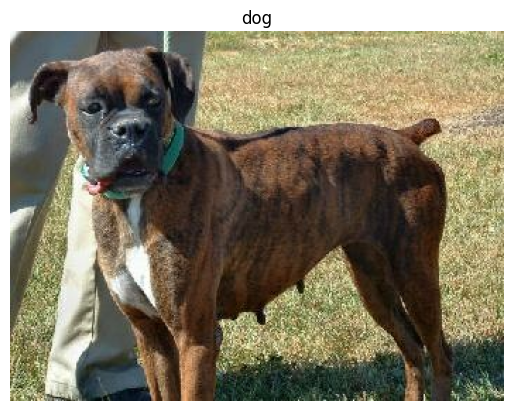

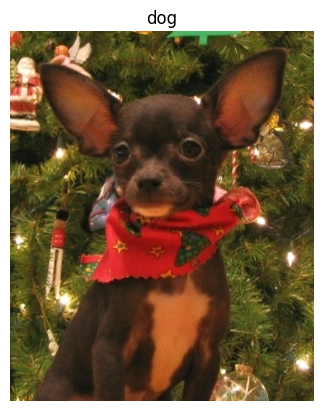

In [5]:
# Obtener las etiquetas de clase
clases = metadatos.features['label'].names

# Obtener dos imágenes aleatorias del conjunto de datos
imagenes = datos['train'].take(2)

# Mostrar las imágenes junto con sus etiquetas
for imagen, etiqueta in imagenes:
    plt.figure()
    plt.imshow(imagen)
    plt.title(clases[etiqueta])
    plt.axis('off')
    plt.show()

In [6]:
len(datos['train'])

23262

In [27]:
x_train = datos['train']

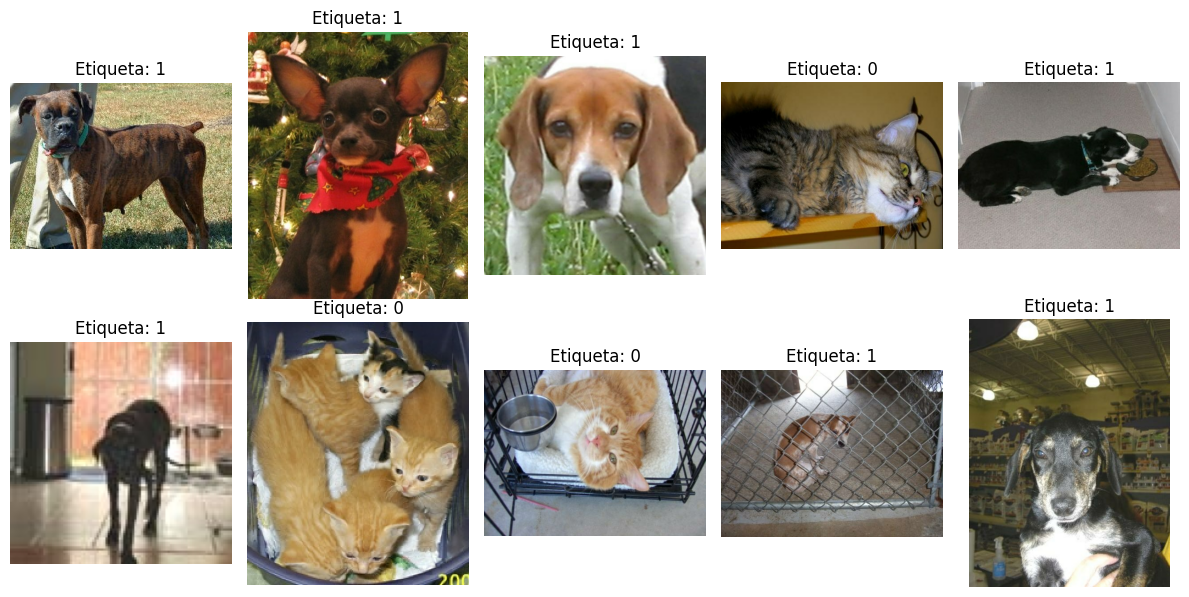

In [29]:
# Mostrar 10 imágenes del conjunto de datos original
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.ravel()

for i, (imagen, etiqueta) in enumerate(datos['train'].take(10)):
    axes[i].imshow(imagen)
    axes[i].set_title('Etiqueta: {}'.format(etiqueta))
    axes[i].axis('off')

plt.tight_layout()
plt.show()

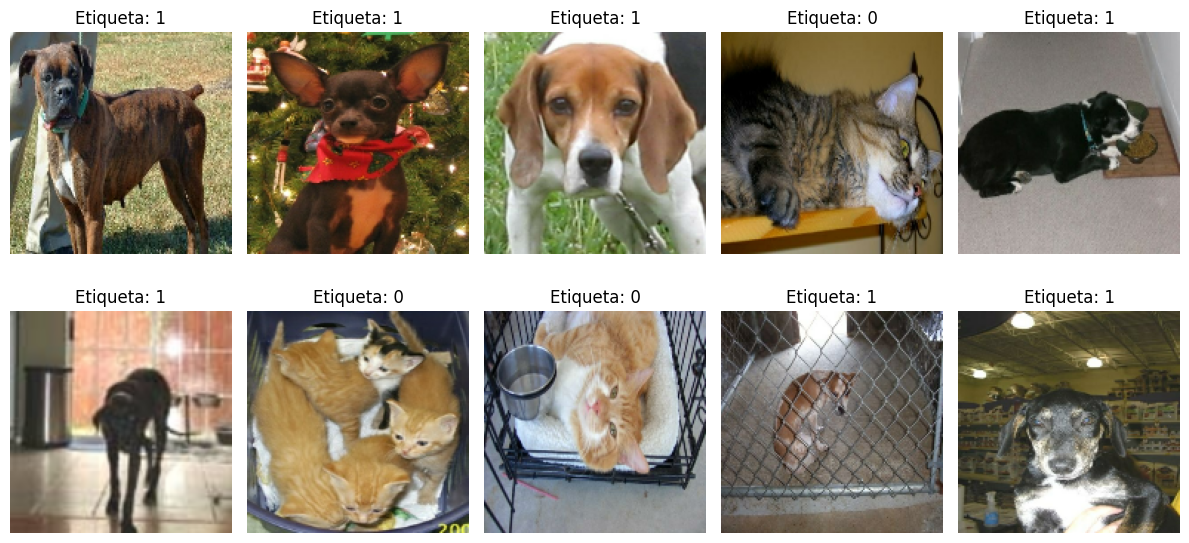

In [31]:
# Redimensionar las imágenes del conjunto de datos original y normalizarlas
datos_redimensionados = datos['train'].map(lambda imagen, etiqueta: (tf.image.resize(imagen, (150, 150))/255.0, etiqueta))

# Mostrar 10 imágenes del conjunto de datos redimensionado y normalizado
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.ravel()

for i, (imagen, etiqueta) in enumerate(datos_redimensionados.take(10)):
    axes[i].imshow(imagen)
    axes[i].set_title('Etiqueta: {}'.format(etiqueta))
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [39]:
from keras.preprocessing.image import ImageDataGenerator

batch_size = 50
epoch_steps = len(datos['train']) // batch_size

gentrain = ImageDataGenerator(rescale=1. / 255.) #indica que reescale cada canal con valor entre 0 y 1.


train = gentrain.flow_from_directory(datos_redimensionados,
                batch_size=batch_size,
                target_size=(150,150),
                class_mode='binary')


TypeError: listdir: path should be string, bytes, os.PathLike, integer or None, not _MapDataset

In [34]:
# Construir el modelo
model = models.Sequential()

# Añadir una capa de convolución personalizada para aplicar el filtro de escala de grises
model.add(layers.Conv2D(1, (3, 3), activation='linear', input_shape=(150, 150, 3)))

# Imprimir la arquitectura del modelo
model.summary()

# Aplicar el filtro de escala de grises a las imágenes redimensionadas y normalizadas
x_train_filtered = model.predict(datos_redimensionados)


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 1)       28        
                                                                 
Total params: 28 (112.00 Byte)
Trainable params: 28 (112.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_7" is incompatible with the layer: expected shape=(None, 150, 150, 3), found shape=(150, 150, 3)


In [15]:
for i in range(2):
    plt.imshow(x_train_filtered[i, :, :, 0])  # Mostrar solo el primer canal (escala de grises)
    plt.colorbar()
    plt.grid(False)
    plt.show()

NameError: name 'x_train_filtered' is not defined